# Проект «А/В-тестирование»

Распаковка файлов из архива

In [1]:
import zipfile
import os

def unzip_file(zip_path, extract_to=None):
    """
    Распаковывает ZIP-архив

    :param zip_path: Путь к ZIP-архиву
    :param extract_to: Директория для распаковки (по умолчанию - рядом с архивом)
    """
    # Если директория не указана, распаковываем в подпапку с именем архива
    if extract_to is None:
        extract_to = os.path.splitext(zip_path)[0]

    # Создаем директорию, если её нет
    os.makedirs(extract_to, exist_ok=True)

    # Распаковываем архив
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f"Архив успешно распакован в: {extract_to}")

In [2]:
unzip_file('М8 Инд задание Доп файлы.zip')

Архив успешно распакован в: М8 Инд задание Доп файлы


In [3]:
import pandas as pd

In [7]:
clicked=pd.read_csv('М8 Инд задание Доп файлы/Data for MDE - clicked.csv')
opened=pd.read_csv('М8 Инд задание Доп файлы/Data for MDE - opened.csv')
monitoring=pd.read_csv('М8 Инд задание Доп файлы/Data for monitoring - first 4 days.csv')
results=pd.read_csv('М8 Инд задание Доп файлы/Data for results.csv')

## Задание 1

Эту часть задания можно было удобнее сделать в формате таблиц или вообще в ручную посчитать, но для удобства отображения всего решения в одном файле кратко перенесу таблицу в формат датафрейма.

In [10]:
# Создаем DataFrame с гипотезами и критериями оценки
data = {
    'Гипотеза': [
        'Использовать более яркие и привлекательные заголовки в email-рассылках',
        'Улучшить мобильную версию сайта',
        'Разработать более персонализированные email-рассылки',
        'Сделать email-рассылки более интерактивными',
        'Разработать систему персонализированных рекомендаций клиентам'
    ],
    'Impact': [4, 8, 5, 2, 9],
    'Reach': [8, 6, 6, 4, 2],
    'Confidence': [4, 6, 4, 4, 7],
    'Ease': [8, 2, 5, 7, 3]
}

df = pd.DataFrame(data)
df

,Гипотеза,Impact,Reach,Confidence,Ease
0,Использовать более яркие и привлекательные заг...,4,8,4,8
1,Улучшить мобильную версию сайта,8,6,6,2
2,Разработать более персонализированные email-ра...,5,6,4,5
3,Сделать email-рассылки более интерактивными,2,4,4,7
4,Разработать систему персонализированных рекоме...,9,2,7,3


In [12]:
# Рассчитываем ICE score
df['ICE Score'] = df['Impact'] * df['Confidence']* df['Ease']

# Рассчитываем RICE score
df['RICE Score'] = (df['Reach'] * df['Impact'] * df['Confidence']) / (10-df['Ease'])

# Сортируем по RICE score (наиболее важная метрика)
df_sorted = df.sort_values('RICE Score', ascending=False).reset_index(drop=True)

# Выводим результаты
print("Приоритизация гипотез:")
df_sorted

Приоритизация гипотез:


,Гипотеза,Impact,Reach,Confidence,Ease,ICE Score,RICE Score
0,Использовать более яркие и привлекательные заг...,4,8,4,8,128,64.000000
1,Улучшить мобильную версию сайта,8,6,6,2,96,36.000000
2,Разработать более персонализированные email-ра...,5,6,4,5,100,24.000000
3,Разработать систему персонализированных рекоме...,9,2,7,3,189,18.000000
4,Сделать email-рассылки более интерактивными,2,4,4,7,56,10.666667


Итак, по методологии RICE в разработку поступает гипотеза "Использовать более яркие и привлекательные заголовки
в email-рассылках, чтобы
привлечь внимание
клиентов и заставить их
нажать на ссылку"


## Задание 2

Поскольку, основная задача стоит в том, чтобы увеличить количество клиентов, которые переходят на сайт через email-рассылки, то:

**Ключевая метрика - CTR:** Это процент пользователей, которые кликнули по ссылке в email-рассылке, по отношению к общему количеству пользователей, которым было доставлено это письмо.  CTR напрямую отражает цель тестирования. Улучшение заголовков должно стимулировать больше пользователей открывать письмо и переходить по ссылке.

**Смежные метрики:**

1. **Open Rate (OR)** для email-рассылок: это процент пользователей, которые открыли email-рассылку, по отношению к общему количеству пользователей, которым было доставлено это письмо. OR является важной смежной метрикой, поскольку она показывает, насколько привлекательными являются заголовки в привлечении внимания пользователей и побуждении их открыть письмо. Увеличение OR должно предшествовать увеличению CTR. Если OR не увеличивается, то проблема может быть не только в заголовке, но и в других факторах (например, время отправки, тема письма).

2. **Conversion Rate** на сайте (из трафика с email-рассылок): это процент пользователей, которые перешли на сайт из email-рассылки и совершили целевое действие (например, покупку, регистрацию, добавление товара в корзину) по отношению к общему количеству пользователей, перешедших на сайт из email-рассылки. Увеличение трафика на сайт - это хорошо, но важно, чтобы этот трафик был "качественным" и приводил к конверсиям. Если CTR растет, но Conversion Rate падает, это может указывать на то, что пользователи, привлеченные более яркими заголовками, не находят на сайте того, что ожидали, или не являются целевой аудиторией.

3. **Unsubscribe Rate** (для email-рассылок): это процент пользователей, которые отписались от email-рассылки, по отношению к общему количеству пользователей, которым было доставлено это письмо. Слишком навязчивые или обманчивые заголовки могут привести к увеличению оттока пользователей. Важно убедиться, что изменение заголовков не приводит к негативным последствиям для удержания аудитории.

## Задание 3a

In [18]:
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
# Преобразуем даты в datetime
opened['date'] = pd.to_datetime(opened['date'], format="%d.%m.%Y")
clicked['date'] = pd.to_datetime(clicked['date'], format="%d.%m.%Y")
opened.dtypes

,0
date,datetime64[ns]
user_id,int64


In [22]:
# 1. Анализ временных рядов для определения акции
# Считаем количество открытий и кликов по дням
daily_opened = opened.groupby('date').size().reset_index(name='opened_count')
daily_clicked = clicked.groupby('date').size().reset_index(name='clicked_count')

# Объединяем данные
daily_data = pd.merge(daily_opened, daily_clicked, on='date', how='left').fillna(0)
daily_data['conversion_rate'] = daily_data['clicked_count'] / daily_data['opened_count'] * 100
daily_data

,date,opened_count,clicked_count,conversion_rate
0,2023-01-01,84,8,9.523810
1,2023-01-02,72,8,11.111111
2,2023-01-03,90,8,8.888889
3,2023-01-04,79,7,8.860759
4,2023-01-05,72,8,11.111111
5,2023-01-06,84,7,8.333333
6,2023-01-07,83,8,9.638554
7,2023-01-08,81,8,9.876543
8,2023-01-09,84,8,9.523810
9,2023-01-10,79,7,8.860759


По данным и так видно, что период акции был с 06.02.2023 по 12.02.2023 включительно. Напишем код для универсального случая поиска даты начала акции, если бы данных было много.

In [24]:
# 2. Поиск аномальных дней (акции)
# Вычисляем скользящее среднее и стандартное отклонение
window = 7  # недельное окно для сравнения
daily_data['rolling_mean'] = daily_data['clicked_count'].rolling(window=window).mean()
daily_data['rolling_std'] = daily_data['clicked_count'].rolling(window=window).std()

# Находим дни, когда клики превышали среднее + 2 стандартных отклонения
daily_data['is_peak'] = daily_data['clicked_count'] > (daily_data['rolling_mean'] + 2 * daily_data['rolling_std'])
peak_days = daily_data[daily_data['is_peak']]

# Предполагаем, что акция была в день с максимальным количеством кликов
campaign_date = peak_days.loc[peak_days['clicked_count'].idxmax(), 'date']
print(f"Предполагаемая дата начала предыдущей акции: {campaign_date.strftime('%Y-%m-%d')}")

Предполагаемая дата начала предыдущей акции: 2023-02-06


In [26]:
# 3. Сравнение показателей во время акции и в обычные дни
# Определяем период акции (7 дней)
campaign_period = pd.date_range(campaign_date, periods=7)

# Фильтруем данные по периоду акции и обычным дням
campaign_data = daily_data[daily_data['date'].isin(campaign_period)]
normal_data = daily_data[~daily_data['date'].isin(campaign_period)]

# Рассчитываем средние значения
avg_normal_clicks = normal_data['clicked_count'].mean()
avg_campaign_clicks = campaign_data['clicked_count'].mean()

increase = avg_campaign_clicks - avg_normal_clicks
increase_pct = (increase / avg_normal_clicks) * 100

print(f"\nСреднее количество кликов:")
print(f"- В обычные дни: {avg_normal_clicks:.1f}")
print(f"- В период акции: {avg_campaign_clicks:.1f}")
print(f"\nУвеличение кликов во время акции: {increase:.1f} ({increase_pct:.1f}%)")


Среднее количество кликов:
- В обычные дни: 7.8
- В период акции: 12.1

Увеличение кликов во время акции: 4.4 (55.9%)


In [34]:
# Проверка дисперсий
from scipy.stats import levene

# Проверка однородности дисперсий
stat, p_levene = levene(campaign_data['clicked_count'], normal_data['clicked_count'])
print(f"Тест Левена: p-value = {p_levene:.4f}")

if p_levene < 0.05:
    print("Дисперсии неравны → используем тест Уэлча")
else:
    print("Дисперсии равны → можно использовать обычный t-тест")

Тест Левена: p-value = 0.4584
Дисперсии равны → можно использовать обычный t-тест



Результат t-теста: t=20.72, p-value=0.0000
Различие статистически значимое (p < 0.05)


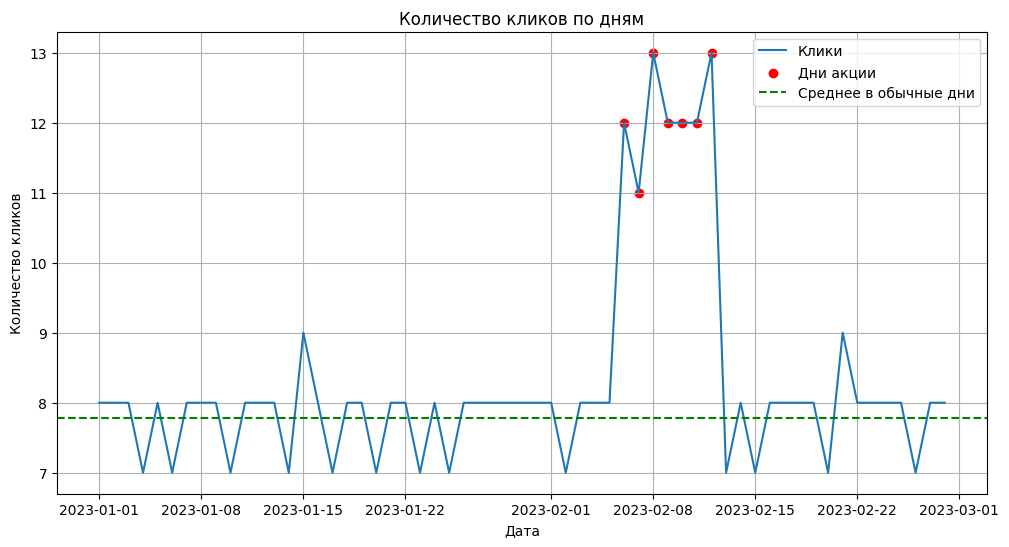

In [35]:
# 4. Проверка статистической значимости
t_stat, p_value = stats.ttest_ind(
    campaign_data['clicked_count'],
    normal_data['clicked_count'],
    equal_var=True
)

print(f"\nРезультат t-теста: t={t_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Различие статистически значимое (p < 0.05)")
else:
    print("Различие не статистически значимое")

# 5. Визуализация
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['clicked_count'], label='Клики')
plt.scatter(campaign_data['date'], campaign_data['clicked_count'], color='red', label='Дни акции')
plt.axhline(avg_normal_clicks, color='green', linestyle='--', label='Среднее в обычные дни')
plt.title('Количество кликов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество кликов')
plt.legend()
plt.grid()
plt.show()

**Вывод:**

период предыдущей акции: 06.02.2023-12.02.2023

среднее количество кликов на период акции увеличилось на 4,4 (55,9%)

## Задание 3b

**Формулировка гипотез**

**Нулевая гипотеза (H₀):**
Акция НЕ повлияла на конверсию из открытия письма в клик.

μ_campaign = μ_normal (средние конверсии в период акции и в обычные дни равны)

**Альтернативная гипотеза (H₁):**
Акция увеличила конверсию из открытия письма в клик.

μ_campaign > μ_normal (односторонняя гипотеза)

Перед тем, как определить параметры статистической значимости и тесты, проверим дисперсии выборок.

In [30]:
import numpy as np

# Разделяем данные
normal_conversion = normal_data['conversion_rate']
campaign_conversion = campaign_data['conversion_rate']

In [33]:
# Проверка дисперсий
from scipy.stats import levene

# Проверка однородности дисперсий
stat, p_levene = levene(campaign_conversion, normal_conversion)
print(f"Тест Левена: p-value = {p_levene:.4f}")

if p_levene < 0.05:
    print("Дисперсии неравны → используем тест Уэлча")
else:
    print("Дисперсии равны → можно использовать обычный t-тест")

Тест Левена: p-value = 0.7455
Дисперсии равны → можно использовать обычный t-тест



**Параметры статистической значимости**

- **Уровень значимости (α):** 0.05 (стандартное значение)
- **Тест:** Односторонний t-тест для независимых выборок
- **Мощность теста (1-β):** 0.8

In [41]:
import numpy as np

# Проводим t-тест
t_stat, p_value = stats.ttest_ind(
    campaign_conversion,
    normal_conversion,
    equal_var=True,
    alternative='greater'  # односторонний тест
)

# 5. Анализ результатов
print(f"Результаты теста:")
print(f"- Средняя конверсия в обычные дни: {normal_conversion.mean().round(1)} %")
print(f"- Средняя конверсия в период акции: {campaign_conversion.mean().round(1)} %")
print(f"- t-статистика: {t_stat:.3f}")
print(f"- p-value: {p_value:.5f}")

if p_value < 0.05:
    print("\nВывод: Отвергаем H₀. Акция статистически значимо увеличила конверсию (p < 0.05).")
    effect_size = (campaign_conversion.mean() - normal_conversion.mean()) / normal_conversion.std()
    print(f"Размер эффекта (Cohen's d): {effect_size:.3f}")
else:
    print("\nВывод: Недостаточно доказательств для отклонения H₀. Акция не оказала значимого влияния.")

Результаты теста:
- Средняя конверсия в обычные дни: 9.5 %
- Средняя конверсия в период акции: 14.5 %
- t-статистика: 17.839
- p-value: 0.00000

Вывод: Отвергаем H₀. Акция статистически значимо увеличила конверсию (p < 0.05).
Размер эффекта (Cohen's d): 7.289


**Вывод:** акция увеличила конверсию статистически значимо.

## Задание 4a

**План A/B-теста для гипотезы о ярких заголовках email-рассылок**

---

**1. Формулировка гипотез**
- **Нулевая гипотеза (H₀):**  
  Изменение заголовков email-рассылок **не влияет** на конверсию в клик.  
  *Формально:*  
  `Конверсия в группе A (старые заголовки) = Конверсия в группе B (новые заголовки)`  

- **Альтернативная гипотеза (H₁):**  
  Более яркие заголовки **увеличивают** конверсию в клик.  
  *Формально:*  
  `Конверсия в группе B > Конверсия в группе A`  
  *(Односторонняя гипотеза, так как интересует только рост конверсии)*.

!!! вроде и посчитала MDE но так и не до конца разобралась, как же всё таки правильно его считать. Буду благодарна за комментарий по этой тебе.


---

**2. Параметры тестирования**
- **Уровень значимости (α):** `0.05` (стандартный порог для ошибки 1-го рода).  
- **Статистическая мощность (1 – β):** `80%` (вероятность обнаружить эффект, если он есть).  
- **Тип теста:**  
  - **Z-тест для пропорций** (т.к. метрика — конверсия, а выборка большая).  
  - **Односторонний** (проверяем только увеличение конверсии).  
- **Минимальный детектируемый эффект (MDE):** `5%` (абсолютное изменение конверсии (по историческим данным)).  
- **Базовый уровень конверсии:**  Из исторических данных: средняя конверсия без акций = `9,5%`.  

---

**3. Расчет размера выборки**
Расчет размера выборки был произведен с помощью калькулятора https://www.evanmiller.org/ab-testing/sample-size.html.

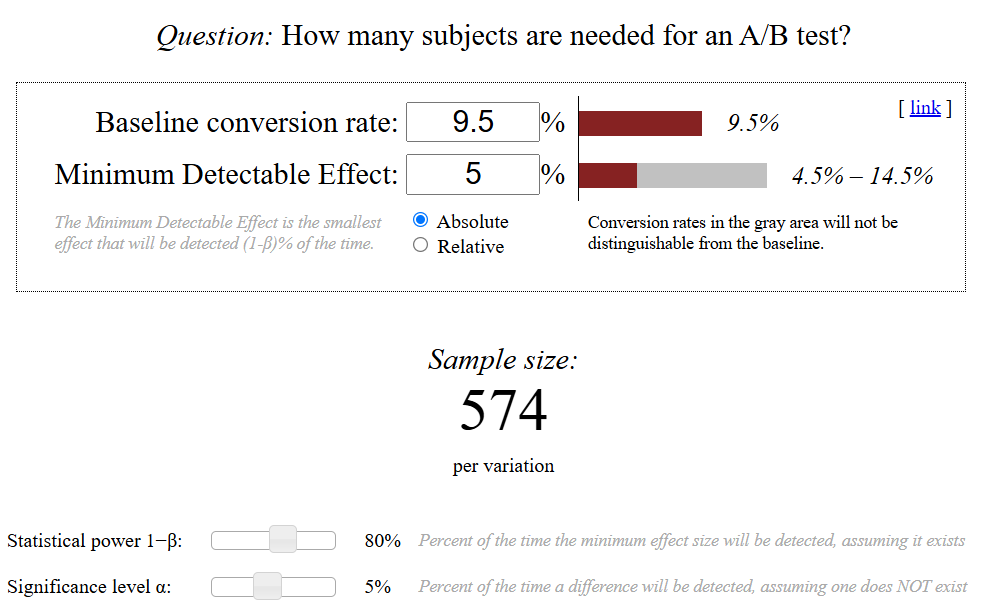
Таким образом необходимо 574 наблюдения на подгруппу или 574*2=1148 на эксперимент.

Если будет 240 писем в день, то потребуется:

In [57]:
from math import ceil
print(np.ceil(1148/240))

5.0


Для проведения теста потребуется 5 дней.

## Задание 4b

Вопросы с выбором правильного ответа.
1. Какой параметр в статистическом тесте задаёт вероятность ошибки 1-го рода, т.
е. когда мы неверно отвергаем нулевую гипотезу.
Варианты ответа:
- **Уровень статистической значимости**
- Мощность статистического теста
- Степень однородности выборки
- Все перечисленные параметры
- Ни один из вариантов
2. За вероятность ошибок 2-го рода отвечает параметр:
Варианты ответа:
- Уровень статистической значимости
- **Мощность статистического теста**
- Тип гипотезы
- Все перечисленные параметры
- Ни один из вариантов
3. Как изменится требуемый размер выборки при уменьшении вероятности ошибки 1-го
рода (при неизменных остальных параметрах)?
- Уменьшится
- **Увеличится**
- Не изменится
- Зависит от статистического критерий


## Задание 5

Проверка базовых метрик

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Группировка данных по дням и группам
daily_metrics = monitoring.groupby(['date', 'group']).agg(
    users=('user_id', 'count'),
    conversions=('converted', 'sum')
).reset_index()
daily_metrics['conversion_rate'] = daily_metrics['conversions'] / daily_metrics['users']

daily_metrics

,date,group,users,conversions,conversion_rate
0,01.03.2023,control,119,12,0.100840
1,01.03.2023,treatment,122,14,0.114754
2,02.03.2023,control,127,12,0.094488
3,02.03.2023,treatment,119,15,0.126050
4,03.03.2023,control,126,12,0.095238
5,03.03.2023,treatment,111,0,0.000000
6,04.03.2023,control,231,22,0.095238
7,04.03.2023,treatment,11,0,0.000000


Видим, что конверсия для группы treatment на 3 и 4 день стала 0, что может свидетельствовать о поломках.

Выявление аномалий

1. **Распределение пользователей между группами:**
Проверка на дисбаланс (A/B группы должны быть примерно равны).

In [62]:
print(f"Распределение пользователей:\n{monitoring['group'].value_counts(normalize=True)}")

Распределение пользователей:
group
control      0.624224
treatment    0.375776
Name: proportion, dtype: float64


Видим дисбаланс групп, возможно нарушен принцип рандомизации.

2. **Временные аномалии:**
Резкие скачки конверсии в отдельные дни.

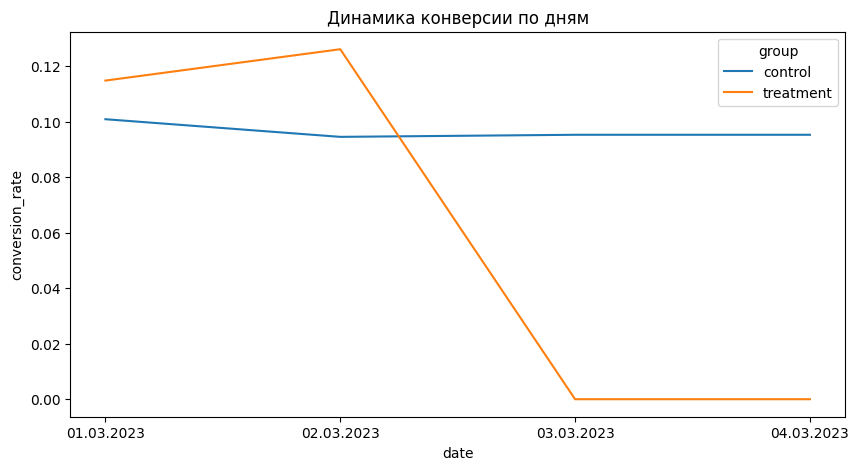

In [63]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_metrics, x='date', y='conversion_rate', hue='group')
plt.title('Динамика конверсии по дням')
plt.show()

Наглядно видим резкое падение конверсии на 3 день.

3. **Статистические тесты:**
Сравнение конверсий между группами (если p-value < 0.05 в первые дни — подозрительно!).

In [64]:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab(monitoring['group'], monitoring['converted'])
_, p_value = fisher_exact(contingency_table)
print(f"p-value: {p_value:.4f}")

p-value: 0.4186


По этому пункту всё в норме.

4. **Аномальные пользователи:**
Проверка на повторные конверсии от одного user_id.

In [65]:
print(f"Пользователи в обеих группах:\n{ monitoring[monitoring.duplicated(['user_id'], keep=False)]}")

Пользователи в обеих группах:
Empty DataFrame
Columns: [date, group, user_id, converted]
Index: []


Тут всё хорошо, один и тот же пользователь в 2 группы сразу не попадает.

5. **Внешние факторы:**
Сравнение с историческими данными (например, если конверсия упала во всех группах).

По этому пункту всё хорошо, видим, что конверсия в контрольной группе на историческом уровне.

**Анализ результатов A/B-теста за первые 4 дня**

**1. Критические проблемы**

1. **Серьезный дисбаланс групп**:
   - Контрольная группа (control): 62.4%
   - Тестовая группа (treatment): 37.6%
   - *Проблема*: Нарушен принцип рандомизации (должно быть близко к 50/50).

2. **Аномалия 4 марта**:
   - В тестовой группе всего 11 пользователей (против 231 в контроле).
   - Конверсия упала до 0% в тестовой группе.

3. **Нестабильность данных**:
   - Конверсия в тестовой группе: от 0% до 12.6%.
   - В контрольной группе стабильнее (~9.5-10.1%).

**2. Возможные причины**

| Дата       | Проблема                          | Вероятная причина                  |
|------------|-----------------------------------|------------------------------------|
| 03.03.2023 | Конверсия treatment = 0%          | Техническая ошибка в трекинге      |
| 04.03.2023 | Крайний дисбаланс (231 vs 11)     | Сбой в распределении пользователей |

**3. Рекомендации**

1. **Срочные действия**:
   - Приостановить тест.
   - Проверить:
     - Систему распределения пользователей (почему treatment получил только 11 пользователей 4 марта?).
     - Трекинг конверсий (почему 0% 3 и 4 марта?).

3. **Как исправить**:
   - Перезапустить тест с:
     - Фиксом распределения (A/B = 50/50).
     - Мониторингом ежедневного баланса групп.
   - Исключить аномальные дни из анализа.

**Вывод:**
Тест **некорректно проводится** из-за:
1. Нарушения рандомизации.
2. Технических сбоев (0% конверсии, резкий дисбаланс).

**Действия:**
1. Исправить систему распределения.
2. Настроить алерты при дисбалансе > 5%.
3. Перезапустить тест после исправлений.


## Задание 6

In [67]:
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

# Конверсия по группам
conversion_rates = results.groupby('group')['converted'].mean()
print(f"Конверсия по группам:\n{conversion_rates}")

Конверсия по группам:
group
control      0.099511
treatment    0.126689
Name: converted, dtype: float64


**Проверка статистической значимости**

Хи-квадрат тест для пропорций.

T-тест для средних.

In [69]:
# Группировка данных по дням и группам
daily_metrics = results.groupby(['date', 'group']).agg(
    users=('user_id', 'count'),
    conversions=('converted', 'sum')
).reset_index()
daily_metrics['conversion_rate'] = daily_metrics['conversions'] / daily_metrics['users']

daily_metrics

,date,group,users,conversions,conversion_rate
0,01.03.2023,control,119,12,0.100840
1,01.03.2023,treatment,122,15,0.122951
2,02.03.2023,control,127,13,0.102362
3,02.03.2023,treatment,119,15,0.126050
4,03.03.2023,control,126,12,0.095238
5,03.03.2023,treatment,111,15,0.135135
6,04.03.2023,control,121,12,0.099174
7,04.03.2023,treatment,120,15,0.125000
8,05.03.2023,control,120,12,0.100000
9,05.03.2023,treatment,120,15,0.125000


In [72]:
# Проверка дисперсий
from scipy.stats import levene

# Проверка однородности дисперсий
stat, p_levene = levene(daily_metrics[daily_metrics.group=='treatment']['conversion_rate'], daily_metrics[daily_metrics.group=='control']['conversion_rate'])
print(f"Тест Левена: p-value = {p_levene:.4f}")

if p_levene < 0.05:
    print("Дисперсии неравны → используем тест Уэлча")
else:
    print("Дисперсии равны → можно использовать обычный t-тест")

Тест Левена: p-value = 0.6816
Дисперсии равны → можно использовать обычный t-тест


In [73]:
def calculate_significance(alpha):
    # Создаем таблицу сопряженности
    contingency_table = pd.crosstab(results['group'], results['converted'])

    # Хи-квадрат тест
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # T-тест для средних (пример для дополнительной метрики)
    control = results[results['group'] == 'control']['converted']
    treatment = results[results['group'] == 'treatment']['converted']
    t_stat, p_value_t = ttest_ind(control, treatment, equal_var=True)

    return {
        'alpha': alpha,
        'p_value_chi2': p_value,
        'p_value_t': p_value_t,
        'significant_chi2': p_value < alpha,
        'significant_t': p_value_t < alpha
    }

# Уровни значимости для проверки
alphas = [0.001, 0.01, 0.05, 0.15]
significance_results = [calculate_significance(alpha) for alpha in alphas]
significance_df = pd.DataFrame(significance_results)

print("\nРезультаты тестов:")
significance_df


Результаты тестов:


,alpha,p_value_chi2,p_value_t,significant_chi2,significant_t
0,0.001,0.161658,0.1363,False,False
1,0.010,0.161658,0.1363,False,False
2,0.050,0.161658,0.1363,False,False
3,0.150,0.161658,0.1363,False,True


Видим, что различия значимы только на уровне значимости 0,15. В остальных случаях конверсии в контрольной и тестовых выборках статистически **не различимы**.

**Выводы**

Данные показывают **отсутствие статистически значимых различий** между группами для большинства уровней значимости, но неоднозначный результат при α = 0.15. Разберём подробно:

---

**1. Ключевые цифры**
- **p-value (Хи-квадрат):** 0.162  
- **p-value (t-тест):** 0.136  
- **Пороги значимости (α):** 0.001, 0.01, 0.05, 0.15  

**2. Статистическая значимость**

| Уровень α | Хи-квадрат (p=0.162) | t-тест (p=0.136) | Вывод                     |
|-----------|-----------------------|------------------|---------------------------|
| 0.001     | Не значимо (False)    | Не значимо (False) | Различий нет             |
| 0.01      | Не значимо (False)    | Не значимо (False) | Различий нет             |
| 0.05      | Не значимо (False)    | Не значимо (False) | Различий нет             |
| 0.15      | Не значимо (False)    | **Значимо (True)** | Слабые признаки эффекта |

---

**3. Практические выводы**
1. **Основной результат:**  
   - Нет убедительных доказательств, что изменения повлияли на конверсию (**p > 0.05**).  
   - При α = 0.15 t-тест показывает значимость, но это **ненадёжно** (высокий риск ложноположительного результата).

2. **Рекомендации:**  
   - **Если конверсия всё же выросла** (например, с 10% до 12%):  
     - Увеличьте размер выборки для проверки слабого эффекта.  
     - Проверьте, нет ли искажений в данных (аномалий, дисбаланса групп).  
   - **Если эффект отсутствует:**  
     - Пересмотрите гипотезу (например, измените заголовки сильнее).  

## Задание 7

1. Генерация искусственных данных: Создадим 5 наборов данных (A/B-тестов) с нормальным распределением, где некоторые имеют реальный эффект, а некоторые - нет:

In [75]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as multi

np.random.seed(42)

# Параметры для генерации данных
n_samples = 1000  # размер каждой выборки
effect_sizes = [0, 0.1, 0.2, 0, 0.15]  # размер эффекта для каждого теста (0 = нет эффекта)

# Генерация данных
data = []
for i, effect in enumerate(effect_sizes):
    control = np.random.normal(0, 1, n_samples)
    treatment = np.random.normal(effect, 1, n_samples)
    data.append((control, treatment))

2. Проведение t-тестов для всех гипотез

In [77]:
# Проводим t-тесты для всех 5 гипотез
p_values = []
for i, (control, treatment) in enumerate(data):
    t_stat, p_val = stats.ttest_ind(treatment, control)
    p_values.append(p_val)
    print(f"Тест {i+1}: p-value = {p_val:.4f}, эффект = {effect_sizes[i]}")

Тест 1: p-value = 0.2441, эффект = 0
Тест 2: p-value = 0.0936, эффект = 0.1
Тест 3: p-value = 0.0000, эффект = 0.2
Тест 4: p-value = 0.3055, эффект = 0
Тест 5: p-value = 0.0069, эффект = 0.15


3. Применение поправки Бонферрони

In [79]:
# Применяем поправку Бонферрони
rejected, corrected_p, _, _ = multi.multipletests(p_values, alpha=0.05, method='bonferroni')

# Создаем таблицу результатов
results = pd.DataFrame({
    'Тест': range(1, 6),
    'Исходный p-value': p_values,
    'Скорректированный p-value': corrected_p,
    'Эффект существует': rejected,
    'Реальный эффект': [effect != 0 for effect in effect_sizes]
})

print("\nРезультаты после поправки Бонферрони:")
results[['Тест', 'Исходный p-value', 'Скорректированный p-value', 'Эффект существует', 'Реальный эффект']]


Результаты после поправки Бонферрони:


,Тест,Исходный p-value,Скорректированный p-value,Эффект существует,Реальный эффект
0,1,0.244072,1.000000,False,False
1,2,0.093551,0.467754,False,True
2,3,0.000006,0.000031,True,True
3,4,0.305458,1.000000,False,False
4,5,0.006878,0.034390,True,True


**Интерпретация результатов**

**Ключевые выводы**:
1. **Тесты 1 и 4**:  
   - Оба p-value > 0.05 (даже до поправки).  
   - Корректно не обнаружен эффект (реального эффекта нет).  

2. **Тест 2**:  
   - Исходный p-value = 0.094 (почти значим при α = 0.1).  
   - После поправки p = 0.468 >> 0.05 → эффект **не значим**.  
   - **Ложноотрицательный результат**: реальный эффект есть, но тест его не обнаружил (из-за строгости поправки).  

3. **Тесты 3 и 5**:  
   - Очень низкие p-value (< 0.01) остались значимыми после поправки.  
   - Корректно обнаружены реальные эффекты.  

4. **Сравнение с реальностью**:  
   - Все значимые результаты — истинные (нет ложноположительных).  
   - Пропущен один реальный эффект (тест 2) — плата за контроль ошибок.